In [3]:
import numpy as np


In [6]:
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


AttributeError: module 'numpy' has no attribute 'ndarray'

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [5]:
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


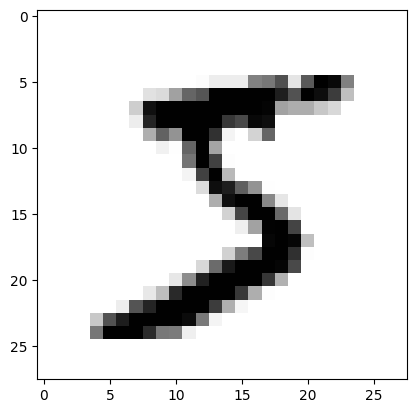

In [11]:
plt.imshow(X_train[0], cmap='gray_r')
plt.show()

In [15]:
for x in X_train[0]:
    for i in x:
        print(f'{i:3d}', end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

In [17]:
# 데이터의 차원 변경, 정규화
# 
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_train = X_train.astype('float64')
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [20]:
print('class:', y_train[0])
y_train[:10]

class: 5


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [21]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [23]:
model = Sequential()
model.add(Dense(512, input_dim=28*28, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_path = './data/model/MNIST_MLP.hdf5'
checkpointer = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

hist = model.fit(X_train, y_train, epochs=2000, validation_split=0.25, batch_size=200, callbacks=[early_stopping, checkpointer])

print('test 정확도:', model.evaluate(X_test, y_test)[1])


Epoch 1/2000
222/225 [============================>.] - ETA: 0s - loss: 1.8477 - accuracy: 0.5666
Epoch 1: val_loss improved from inf to 1.20293, saving model to ./data/model\MNIST_MLP.hdf5
225/225 [==============================] - 5s 17ms/step - loss: 1.8398 - accuracy: 0.5687 - val_loss: 1.2029 - val_accuracy: 0.7736
Epoch 2/2000
224/225 [============================>.] - ETA: 0s - loss: 0.8991 - accuracy: 0.8052
Epoch 2: val_loss improved from 1.20293 to 0.66478, saving model to ./data/model\MNIST_MLP.hdf5
225/225 [==============================] - 4s 17ms/step - loss: 0.8978 - accuracy: 0.8055 - val_loss: 0.6648 - val_accuracy: 0.8485
Epoch 3/2000
225/225 [==============================] - ETA: 0s - loss: 0.5864 - accuracy: 0.8579
Epoch 3: val_loss improved from 0.66478 to 0.49090, saving model to ./data/model\MNIST_MLP.hdf5
225/225 [==============================] - 4s 17ms/step - loss: 0.5864 - accuracy: 0.8579 - val_loss: 0.4909 - val_accuracy: 0.8786
Epoch 4/2000
225/225 [====

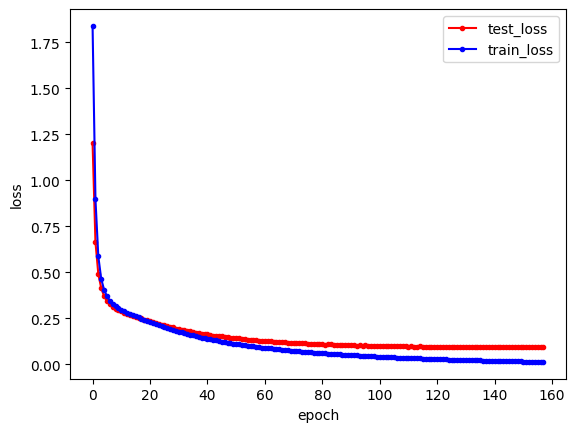

In [33]:
y_vloss = hist.history['val_loss']
y_loss = hist.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, 'r.-', label='test_loss')
plt.plot(x_len, y_loss, 'b.-', label='train_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()